# **Chapter 10: Artificial Neural Networks**

### 1. Fundamental Concepts
- Biological Inspiration: ANNs are inspired by the structure and function of biological neurons in the human brain. Each neuron receives inputs, processes them, and produces an output, similar to how biological neurons communicate through synapses.
- Basic Components:
  - Input Layer: The first layer that receives the input features.
  - Hidden Layers: Intermediate layers that transform inputs into outputs through weighted connections and activation functions.
  - Output Layer: The final layer that produces the output predictions.
  - Weights and Biases: Parameters that are adjusted during training to minimize the error in predictions.
  - Fungsi aktivasi (activation function)s: Functions applied to the output of each neuron to introduce non-linearity, allowing the network to learn complex patterns.

### 2. Core Components
#### 2.1 Neuron buatan (Artificial Neuron) Structure
- Mathematical Model: Each neuron computes a weighted sum of its inputs and applies an activation function:
  \[ output = activation(\sum (weights \times inputs) + bias) \]
- Common Fungsi aktivasi (activation function)s:
  - ReLU (Rectified Linear Unit) (Rectified Linear Unit): Outputs the input directly if positive; otherwise, it outputs zero. It helps mitigate the vanishing gradient problem.
  - Sigmoid: Maps input to a value between 0 and 1, useful for binary classification.
  - Tanh: Similar to sigmoid but outputs values between -1 and 1, centering the data.
  - Softmax: Converts logits to probabilities for multi-class classification, ensuring the outputs sum to 1.

Fungsi ReLU (Rectified Linear Unit) (Rectified Linear Unit) banyak digunakan karena kesederhanaannya dan membantu mengurangi masalah vanishing gradient.

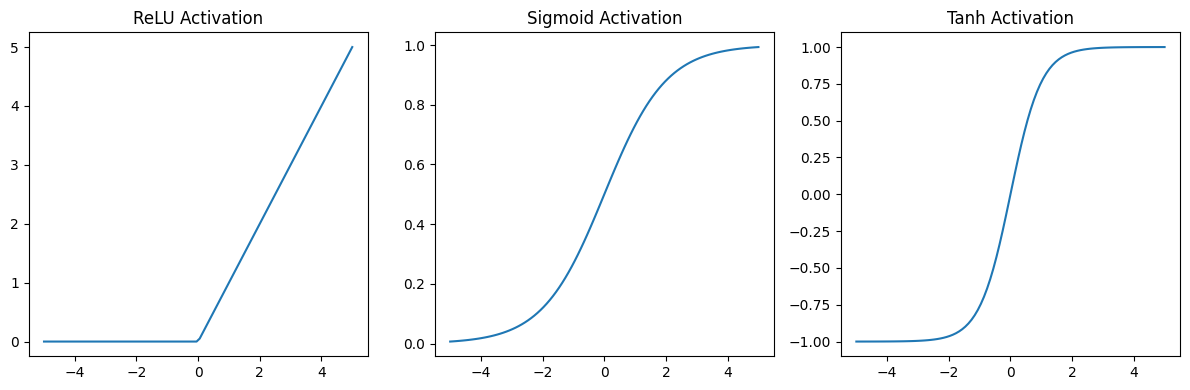

In [1]:
# Activation Function Visualization
# Mengimpor pustaka (library) yang diperlukan
import numpy as np
# Mengimpor pustaka (library) yang diperlukan
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

def relu(x): return np.maximum(0, x)
def sigmoid(x): return 1 / (1 + np.exp(-x))
def tanh(x): return np.tanh(x)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, relu(x))
plt.title('ReLU Activation')

plt.subplot(1, 3, 2)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid Activation')

plt.subplot(1, 3, 3)
plt.plot(x, tanh(x))
plt.title('Tanh Activation')

plt.tight_layout()
plt.show()

### 3. Training Process
#### 3.1 Backpropagation Algorithm
- Forward Pass: The input data is passed through the network, layer by layer, to compute the output predictions.
- Loss Calculation: The difference between the predicted output and the actual target is calculated using a loss function (e.g., Mean Squared Error for regression, Cross-Entropy for classification).
- Backward Pass: The algorithm computes the gradient of the loss with respect to each weight by applying the chain rule, allowing the model to update weights to minimize the loss.
- Gradient Descent: An optimization algorithm used to adjust the weights based on the computed gradients, iteratively improving the model's predictions.

In [2]:
# Simple Neural Network with TensorFlow/Keras
# Mengimpor pustaka (library) yang diperlukan
import tensorflow as tf
# Mengimpor pustaka (library) yang diperlukan
from tensorflow import keras
# Mengimpor pustaka (library) yang diperlukan
from sklearn.datasets import load_iris
# Mengimpor pustaka (library) yang diperlukan
from sklearn.model_selection import train_test_split

# Load and prepare data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42)

# Build model
# Membuat model ANN menggunakan Keras Sequential API
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(4,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

# Compile model
# Menyusun (compile) model dengan fungsi loss dan optimizer (pengoptimal)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
# Melatih model dengan data training
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate
# Mengevaluasi model dengan data testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - accuracy: 0.3542 - loss: 1.8610 - val_accuracy: 0.2083 - val_loss: 2.1196
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3503 - loss: 1.5830 - val_accuracy: 0.2083 - val_loss: 1.7585
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4193 - loss: 1.1783 - val_accuracy: 0.3750 - val_loss: 1.5191
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6510 - loss: 1.1582 - val_accuracy: 0.5000 - val_loss: 1.3459
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.7135 - loss: 1.0613 - val_accuracy: 0.5000 - val_loss: 1.2074
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6940 - loss: 1.0010 - val_accuracy: 0.5000 - val_loss: 1.0907
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6953 - loss: 0.9537 - val_accuracy: 0.5000 - val_loss: 0.9906
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7031 - loss: 0.8858 - val_accuracy: 0.5000 - val_loss: 0.9089

### 4. Architectural Variations
#### 4.1 Multilayer Perceptrons (MLP)
- Definition: A type of ANN with one or more hidden layers, where each layer is fully connected to the next.
- Functionality: MLPs can approximate any continuous function given enough neurons and layers.

#### 4.2 Deep Neural Networks
- Definition: Networks with multiple hidden layers (more than two).
- Benefits: Capable of learning complex representations and features from data, especially with large datasets.

### 5. Practical Considerations
- Hyperparameter Tuning:
  - Number of Layers and Units: More layers can capture more complex patterns, but risk overfitting.
  - Learning Rate: A critical parameter that controls how much to change the model in response to the estimated error each time the model weights are updated.
  - Batch Size: The number of training examples utilized in one iteration. Smaller batch sizes can lead to better generalization.
  - Regularization Techniques: Such as Dropout (randomly dropping units during training) and L2 regularization (penalizing large weights).
- Common Challenges:
  - Vanishing/Exploding Gradients: Issues that can occur during training of deep networks, where gradients become too small or too large.
  - Overfitting: When the model learns noise in the training data instead of the actual pattern, leading to poor performance on unseen data.
  - Computational Requirements: Training deep networks can be resource-intensive, requiring powerful hardware.

### 6. Real-World Applications
- Image Classification: Identifying objects within images (e.g., facial recognition).
- Natural Language Processing: Understanding and generating human language (e.g., chatbots).
- Time Series Forecasting: Predicting future values based on past data (e.g., stock prices).
- Recommendation Systems: Suggesting products or content based on user behavior.

### 7. Key Takeaways
- Powerful Function Approximators: ANNs can model complex relationships in data.
- Need for Careful Tuning: Hyperparameters significantly affect performance.
- Frameworks: Modern libraries like TensorFlow and PyTorch simplify the implementation of neural networks.
- Effectiveness: Particularly strong in tasks involving complex pattern recognition.